In [3]:
import sys
sys.path.append('/home/waves8/Thy/Wikipedia-Knowledge-Graph')
import os
os.chdir("/home/waves8/Thy/Wikipedia-Knowledge-Graph")
from src.utils.wiki_article_regressor import *
from src.utils.helpper_function import *
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [2]:
# !pip install textstat

In [4]:
def import_data_from_tsv(tsv_file):
    """ Import data from tsv file. Please note that Wikipedia training data comes in tsv format.
        
        Parameters
            ----------
            tsv_file (tsv): Training data

            Returns
            -------
            dataframe (Pandas DataFrame): DataFrame with data correctly formatted
    """
    data = pd.read_csv(tsv_file, sep='\t', header=None)
    return pd.DataFrame(data=list(data[0].apply(literal_eval)))

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
data = import_data_from_tsv('/home/waves8/Thy/Wikipedia-Knowledge-Graph/web_data/enwiki.observations.text_wp10.30k.tsv')

In [8]:
df = transform_data(data)

In [5]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df['text'] = df['text'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df = df[df['cleaned_text'] != ' '].reset_index()
df.to_csv('data_preprocessed.csv')

In [8]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 5 columns that have missing values.


Missing Values  % of Total Values
dale_chall_readability_score              41                0.1
readability_index                         41                0.1
gunning_fog_index                         41                0.1
cleaned_text                              37                0.1
text                                      12                0.0

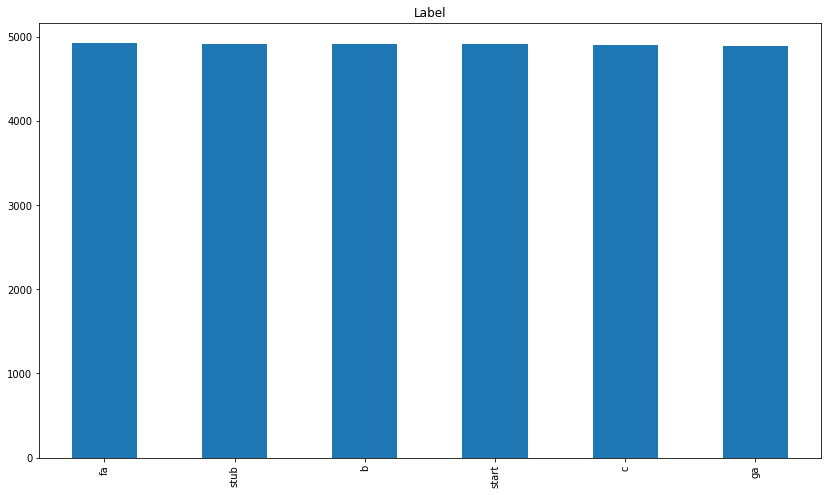

In [9]:
df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label")

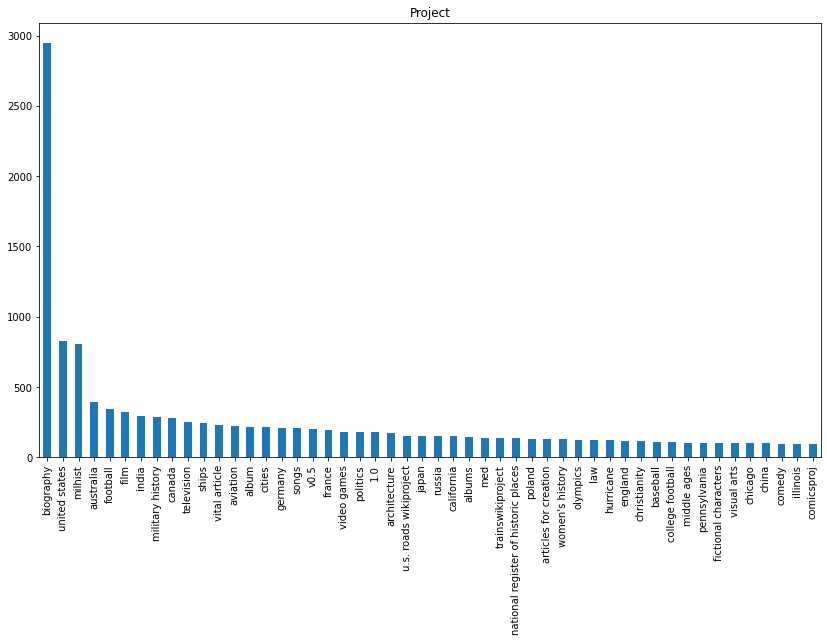

In [11]:
df['project'].value_counts().head(50).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Project")

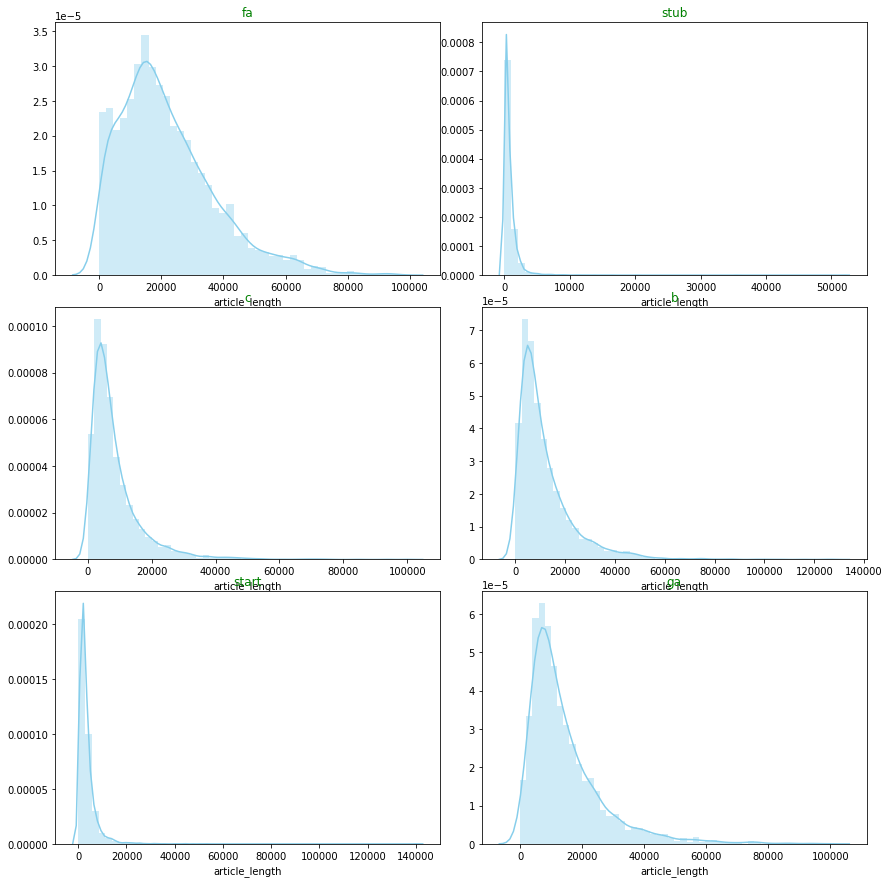

In [10]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
f.tight_layout()
for i, feature in enumerate(['fa', 'c', 'start', 'stub', 'b', 'ga']):
    sns.distplot(df[df['label'] == feature]['article_length'] , color="skyblue", ax=axes[i%3, i//3]).set_title(feature,color="green")